**E-Commerce Customer Conversion**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import zscore



In [35]:
#
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/conversion_data.csv')

In [36]:
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


**Step1: Data Cleaning & Exploration**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [38]:
df.drop(columns='Unnamed: 0', axis= 0, inplace= True)

In [39]:
df.describe(include='all')

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


**Creating Features to reduce dimension**

In [40]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [41]:
df['total_avg_prod_view'] = (df['product_views_Mon'] + df['product_views_Tue'] +df['product_views_Wed'] + df['product_views_Thu'] + df ['product_views_Fri'])/5

In [42]:
df['total_avg_rating'] = (df['avg_rating_Mon'] + df['avg_rating_Tue'] +df['avg_rating_Wed'] + df['avg_rating_Thu'] + df ['avg_rating_Fri'])/5

In [43]:
df['total_avg_price'] = (df['avg_price_Mon'] + df['avg_price_Tue'] +df['avg_price_Wed'] + df['avg_price_Thu'] + df ['avg_price_Fri'])/5

In [44]:
df['total_avg_time_on_site'] = (df['time_on_site_Mon'] + df['time_on_site_Tue'] +df['time_on_site_Wed'] + df['time_on_site_Thu'] + df ['time_on_site_Fri'])/5

In [45]:
df['total_avg_page_visited'] = (df['pages_visited_Mon'] + df['pages_visited_Tue'] +df['pages_visited_Wed'] + df['pages_visited_Thu'] + df ['pages_visited_Fri'])/5

In [46]:
df

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,total_avg_prod_view,total_avg_rating,total_avg_price,total_avg_time_on_site,total_avg_page_visited
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,5,5,4,6,1,2.8,3.134,54.738,43.2,4.8
1,2,South America,organic,F,2,5,0,1,5,1.31,...,6,7,6,2,0,2.6,2.068,71.432,33.2,5.2
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,3,3,2,3,1,1.8,3.666,64.358,28.8,2.4
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,4,7,7,1,0,1.2,3.300,56.048,37.2,4.4
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,6,5,2,4,1,2.6,2.364,46.442,44.6,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Europe,organic,F,3,0,0,4,2,4.80,...,1,5,7,7,0,1.8,3.008,57.260,35.6,5.0
1996,1997,South America,google,M,1,2,0,4,1,1.34,...,6,6,7,6,0,1.6,1.858,45.702,45.6,5.2
1997,1998,Asia,facebook,M,2,3,0,0,8,2.56,...,1,7,6,4,0,2.6,3.280,52.544,34.8,4.0
1998,1999,South America,youtube,F,2,2,2,5,5,4.49,...,4,2,2,3,1,3.2,3.662,51.752,37.8,3.4


**Exploratory Data Analysis** 

**Objective: To identify any patterns, trends and correlation between different features.**

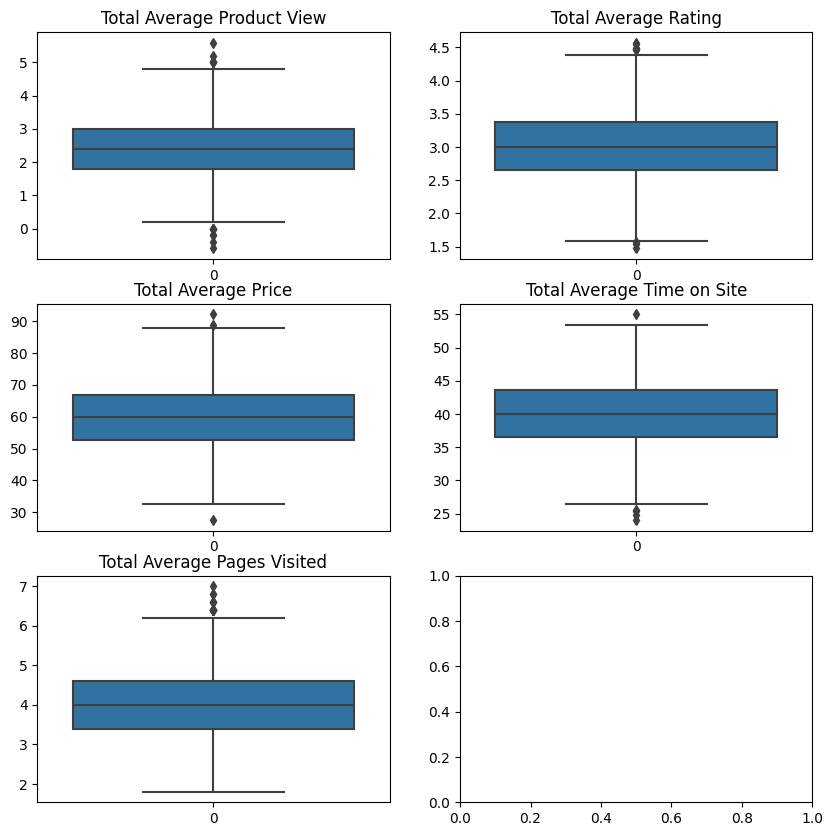

In [57]:
fig, axs= plt.subplots(3, 2, figsize = (10,10))
# Plotting the box plots with titles
sns.boxplot(df['total_avg_prod_view'], ax=axs[0][0])
axs[0][0].set_title('Total Average Product View')

sns.boxplot(df['total_avg_rating'], ax=axs[0][1])
axs[0][1].set_title('Total Average Rating')

sns.boxplot(df['total_avg_price'], ax=axs[1][0])
axs[1][0].set_title('Total Average Price')

sns.boxplot(df['total_avg_time_on_site'], ax=axs[1][1])
axs[1][1].set_title('Total Average Time on Site')

sns.boxplot(df['total_avg_page_visited'], ax=axs[2][0])
axs[2][0].set_title('Total Average Pages Visited')

plt.show()


**Outlier Removal**


**Using Z-Score method to remove outliers for better accuracy**

In [59]:
numerical_columns= ['total_avg_prod_view',	'total_avg_rating',	'total_avg_price',	'total_avg_time_on_site',	'total_avg_page_visited']
categorical_columns = ['visitor_location', 'gender', 'converted_Fri', 'marketing_channel']

In [62]:
for column in numerical_columns:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

total_avg_prod_view: skewness = 0.08152384170156853, kurtosis = -0.31706565166685685
total_avg_rating: skewness = -0.01955180276451296, kurtosis = -0.21508188709720866
total_avg_price: skewness = 0.11196913330273442, kurtosis = -0.2722925608746758
total_avg_time_on_site: skewness = -0.024097830179721905, kurtosis = -0.261084325522595
total_avg_page_visited: skewness = 0.07247798018489873, kurtosis = -0.2735367060678282


In [63]:
#creating a copy of df to test outlier removal
df2 = df.copy()

In [65]:
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df2[numerical_columns])
threshold = 3
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   visitor_id              1992 non-null   int64  
 1   visitor_location        1992 non-null   object 
 2   marketing_channel       1992 non-null   object 
 3   gender                  1992 non-null   object 
 4   product_views_Mon       1992 non-null   int64  
 5   product_views_Tue       1992 non-null   int64  
 6   product_views_Wed       1992 non-null   int64  
 7   product_views_Thu       1992 non-null   int64  
 8   product_views_Fri       1992 non-null   int64  
 9   avg_rating_Mon          1992 non-null   float64
 10  avg_rating_Tue          1992 non-null   float64
 11  avg_rating_Wed          1992 non-null   float64
 12  avg_rating_Thu          1992 non-null   float64
 13  avg_rating_Fri          1992 non-null   float64
 14  avg_price_Mon           1992 non-null   float

In [68]:
#Since we only have 8 outliers in our dataset we will intitate and drop those from our main dataframe

In [69]:
if abs(s) > 1:
    df[column] = df[column].apply(lambda x: np.log(x + 1))
z_scores = zscore(df[numerical_columns])
threshold = 3
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   visitor_id              1992 non-null   int64  
 1   visitor_location        1992 non-null   object 
 2   marketing_channel       1992 non-null   object 
 3   gender                  1992 non-null   object 
 4   product_views_Mon       1992 non-null   int64  
 5   product_views_Tue       1992 non-null   int64  
 6   product_views_Wed       1992 non-null   int64  
 7   product_views_Thu       1992 non-null   int64  
 8   product_views_Fri       1992 non-null   int64  
 9   avg_rating_Mon          1992 non-null   float64
 10  avg_rating_Tue          1992 non-null   float64
 11  avg_rating_Wed          1992 non-null   float64
 12  avg_rating_Thu          1992 non-null   float64
 13  avg_rating_Fri          1992 non-null   float64
 14  avg_price_Mon           1992 non-null   float

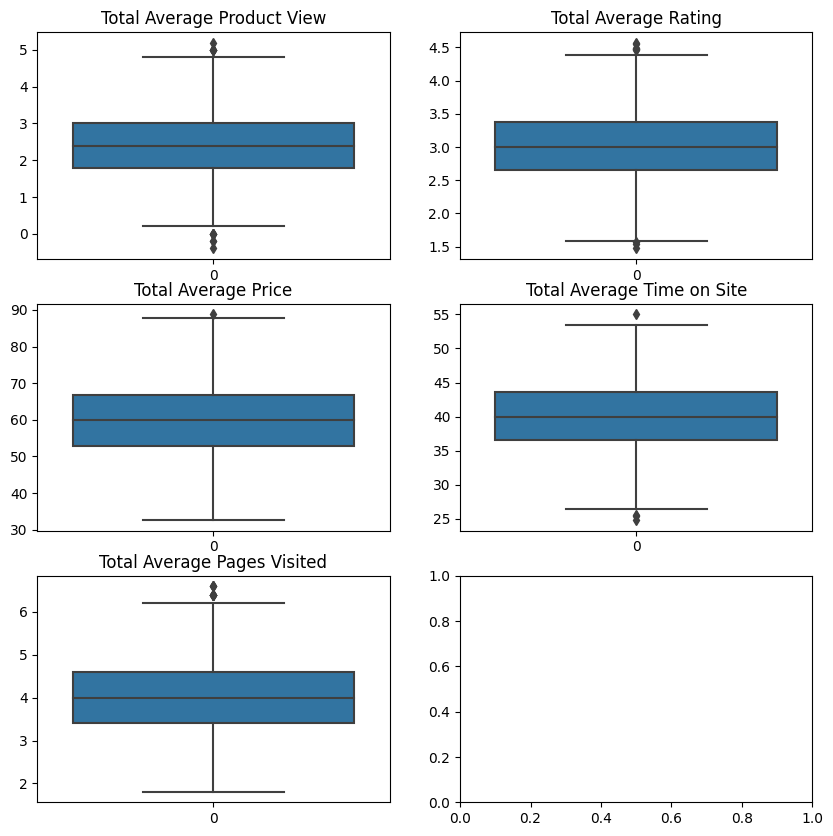

In [71]:
fig, axs= plt.subplots(3, 2, figsize = (10,10))
# Plotting the box plots with titles
sns.boxplot(df['total_avg_prod_view'], ax=axs[0][0])
axs[0][0].set_title('Total Average Product View')

sns.boxplot(df['total_avg_rating'], ax=axs[0][1])
axs[0][1].set_title('Total Average Rating')

sns.boxplot(df['total_avg_price'], ax=axs[1][0])
axs[1][0].set_title('Total Average Price')

sns.boxplot(df['total_avg_time_on_site'], ax=axs[1][1])
axs[1][1].set_title('Total Average Time on Site')

sns.boxplot(df['total_avg_page_visited'], ax=axs[2][0])
axs[2][0].set_title('Total Average Pages Visited')

plt.show()

**Part 2:**

**Statistical Analysis: To review how the metrics change based on demographic**

In [72]:
df.head()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,total_avg_prod_view,total_avg_rating,total_avg_price,total_avg_time_on_site,total_avg_page_visited
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,5,5,4,6,1,2.8,3.134,54.738,43.2,4.8
1,2,South America,organic,F,2,5,0,1,5,1.31,...,6,7,6,2,0,2.6,2.068,71.432,33.2,5.2
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,3,3,2,3,1,1.8,3.666,64.358,28.8,2.4
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,4,7,7,1,0,1.2,3.300,56.048,37.2,4.4
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,6,5,2,4,1,2.6,2.364,46.442,44.6,4.6


In [73]:
df.groupby('visitor_location')[['total_avg_prod_view','total_avg_rating','total_avg_price','total_avg_time_on_site','total_avg_page_visited']].mean()


,total_avg_prod_view,total_avg_rating,total_avg_price,total_avg_time_on_site,total_avg_page_visited
visitor_location,,,,,
Asia,2.386957,3.023962,60.254082,39.809239,3.967935
Australia,2.363682,2.995239,60.210602,40.169652,3.990547
Europe,2.469291,3.000541,60.260210,39.692388,3.955381
North America,2.332029,3.008181,59.672538,40.120293,4.119804
South America,2.478241,3.022495,59.967653,40.341204,4.050000


In [76]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_prod_view']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_prod_view']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_prod_view']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_prod_view']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_prod_view']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=1.851272565345193, pvalue=0.11642747467463124)


In [77]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_rating']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_rating']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_rating']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_rating']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_rating']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=0.2388839347272661, pvalue=0.9164244139801958)


In [78]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_price']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_price']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_price']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_price']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_price']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=0.24885199067849398, pvalue=0.910453449941384)


In [79]:
loc_1 = df[df['visitor_location'] == 'Asia']['total_avg_time_on_site']
loc_2 = df[df['visitor_location'] == 'Australia']['total_avg_time_on_site']
loc_3 = df[df['visitor_location'] == 'Europe']['total_avg_time_on_site']
loc_4 = df[df['visitor_location'] == 'North America']['total_avg_time_on_site']
loc_5 = df[df['visitor_location'] == 'South America']['total_avg_time_on_site']

p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=1.1031953891124753, pvalue=0.35334002693537164)


In [81]:
df.groupby('marketing_channel')[['total_avg_prod_view','total_avg_rating','total_avg_price','total_avg_time_on_site','total_avg_page_visited']].mean()


,total_avg_prod_view,total_avg_rating,total_avg_price,total_avg_time_on_site,total_avg_page_visited
marketing_channel,,,,,
facebook,2.410714,3.026286,59.735566,40.164796,4.063265
google,2.391960,2.967523,60.219583,40.140201,4.070352
instagram,2.407477,3.035715,60.378173,40.060748,4.004673
organic,2.336946,3.023281,60.457542,39.956158,3.969458
youtube,2.493478,2.994723,59.451201,39.860870,3.988043


In [82]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_prod_view']
m2 = df[df['marketing_channel'] == 'google']['total_avg_prod_view']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_prod_view']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_prod_view']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_prod_view']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.3024443721028962, pvalue=0.2668468685688844)


In [83]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_rating']
m2 = df[df['marketing_channel'] == 'google']['total_avg_rating']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_rating']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_rating']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_rating']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.152451509759677, pvalue=0.33007284366640444)


In [84]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_price']
m2 = df[df['marketing_channel'] == 'google']['total_avg_price']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_price']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_price']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_price']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=0.7119672196331803, pvalue=0.5837023663713832)


In [85]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_time_on_site']
m2 = df[df['marketing_channel'] == 'google']['total_avg_time_on_site']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_time_on_site']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_time_on_site']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_time_on_site']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=0.24051731426981451, pvalue=0.9154546133874496)


In [87]:
m1 = df[df['marketing_channel'] == 'facebook']['total_avg_page_visited']
m2 = df[df['marketing_channel'] == 'google']['total_avg_page_visited']
m3 = df[df['marketing_channel'] == 'instagram']['total_avg_page_visited']
m4 = df[df['marketing_channel'] == 'organic']['total_avg_page_visited']
m5 = df[df['marketing_channel'] == 'youtube']['total_avg_page_visited']


p_val = stats.f_oneway(m1, m2,m3,m4,m5)
print(p_val)

F_onewayResult(statistic=1.017767393712429, pvalue=0.3967548130344334)


In [88]:
df.groupby('gender')[['total_avg_prod_view','total_avg_rating','total_avg_price','total_avg_time_on_site','total_avg_page_visited']].mean()


,total_avg_prod_view,total_avg_rating,total_avg_price,total_avg_time_on_site,total_avg_page_visited
gender,,,,,
F,2.480147,3.008640,59.977963,39.924449,4.023162
M,2.317920,3.011918,60.169662,40.176549,4.014159


In [89]:
g1 = df[df['gender'] == 'F']['total_avg_prod_view']
g2 = df[df['gender'] == 'M']['total_avg_prod_view']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=14.071346849169478, pvalue=0.00018103910612953867)


In [90]:
g1 = df[df['gender'] == 'F']['total_avg_rating']
g2 = df[df['gender'] == 'M']['total_avg_rating']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.01936064042872285, pvalue=0.8893516095258578)


In [91]:
g1 = df[df['gender'] == 'F']['total_avg_price']
g2 = df[df['gender'] == 'M']['total_avg_price']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.17505300390094736, pvalue=0.6757046869735561)


In [92]:
g1 = df[df['gender'] == 'F']['total_avg_time_on_site']
g2 = df[df['gender'] == 'M']['total_avg_time_on_site']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=1.212237198510622, pvalue=0.2710226587126338)


In [94]:
g1 = df[df['gender'] == 'F']['total_avg_page_visited']
g2 = df[df['gender'] == 'M']['total_avg_page_visited']

p_val = stats.f_oneway(g1,g2)
print(p_val)

F_onewayResult(statistic=0.05002871629722797, pvalue=0.8230362714374941)


**Insights from Statistical Analysis**
- There is a statistically significant difference in total_avg_page_visited for locations (and somewhat in total_avg_prod_view)
- There is no statistically significant difference in all 5 metrics based on marketing channel
- There is a very statistically significant difference in total_avg_prod_view for different genders.

In [99]:
df.columns

Index(['visitor_id', 'visitor_location', 'marketing_channel', 'gender',
       'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri',
       'total_avg_prod_view', 'total_avg_rating', 'total_avg_price',
       'total_avg_time_on_site', 'total_avg_page_visited'],
      dtype='object')

In [100]:
all_numerical_Columns= ['product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri',
       'total_avg_prod_view', 'total_avg_rating', 'total_avg_price',
       'total_avg_time_on_site', 'total_avg_page_visited']

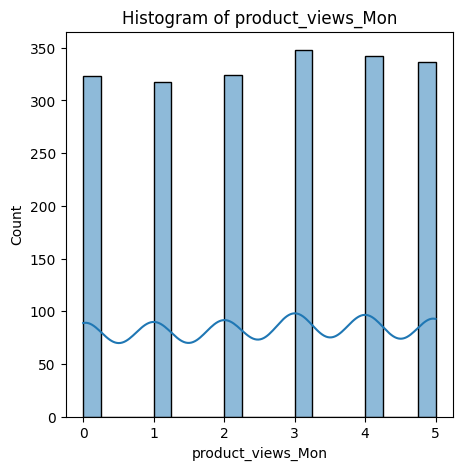

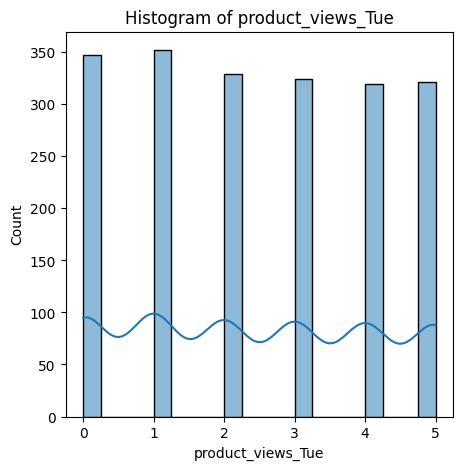

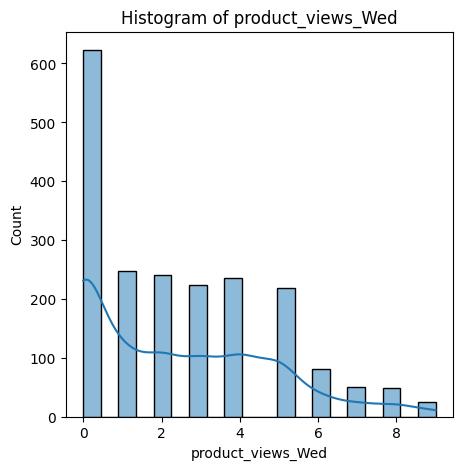

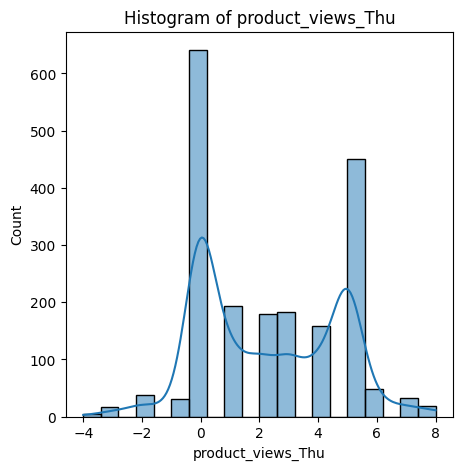

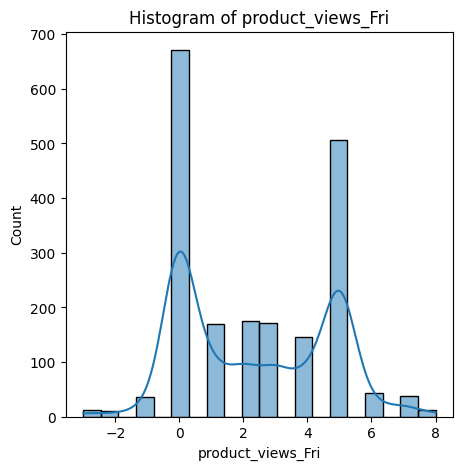

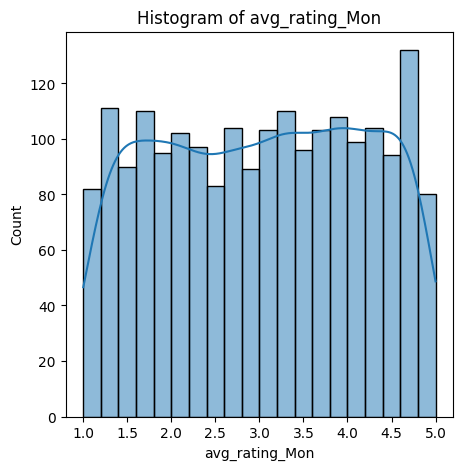

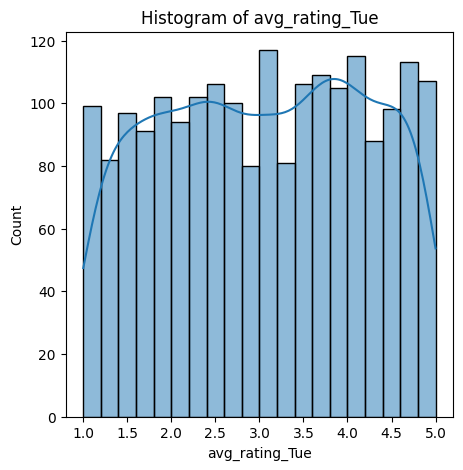

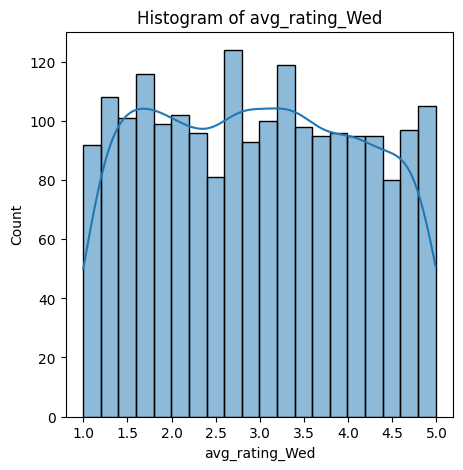

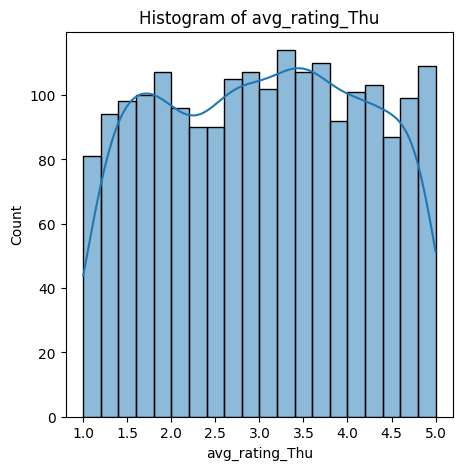

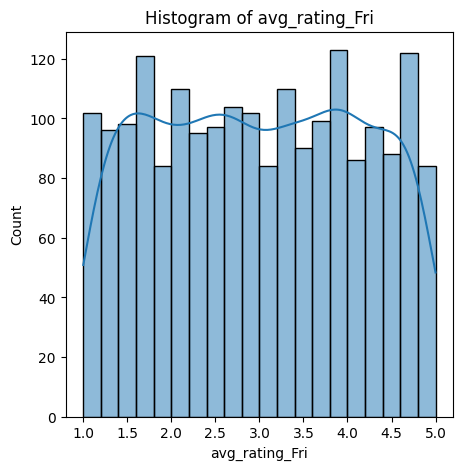

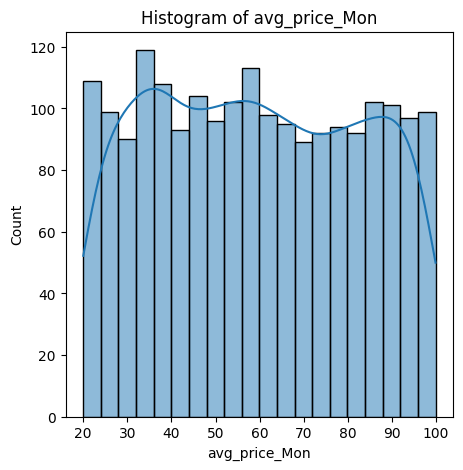

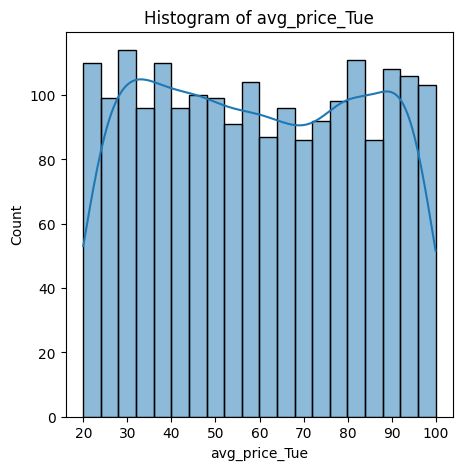

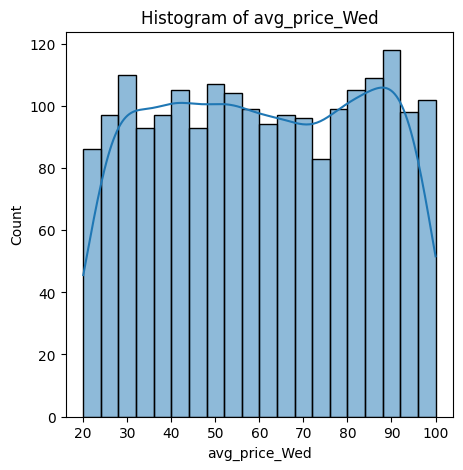

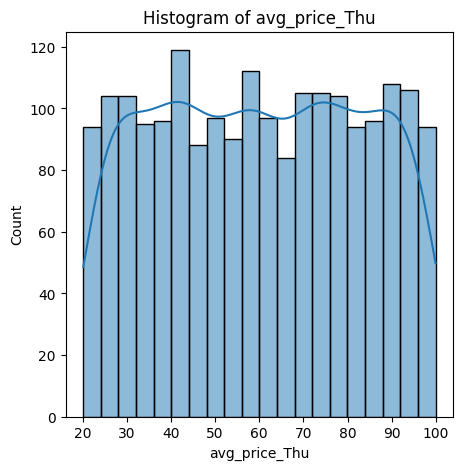

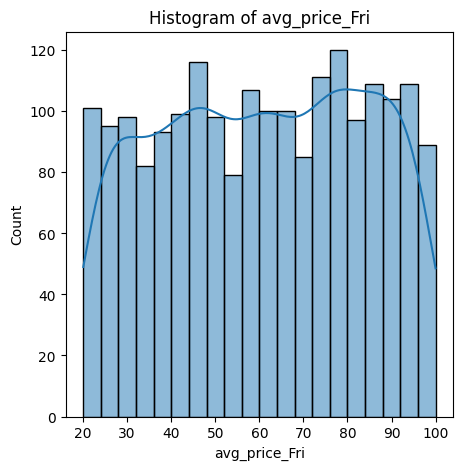

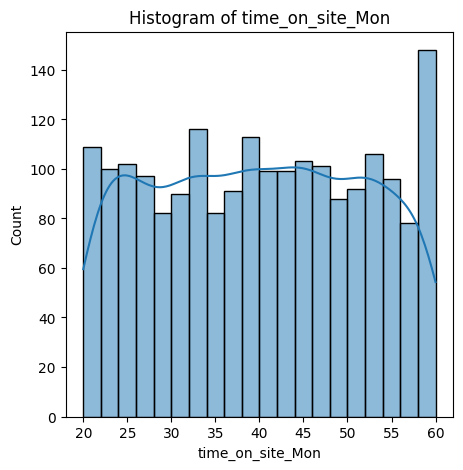

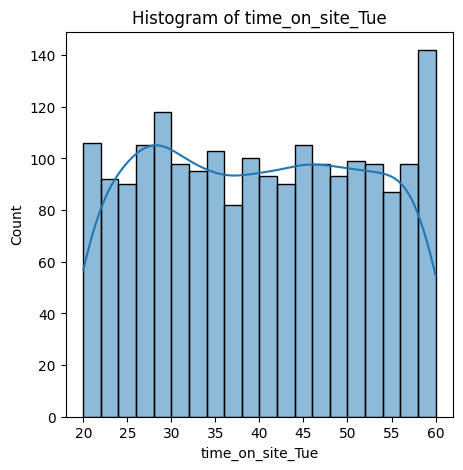

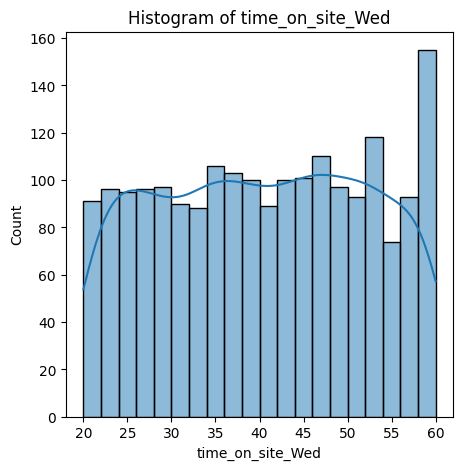

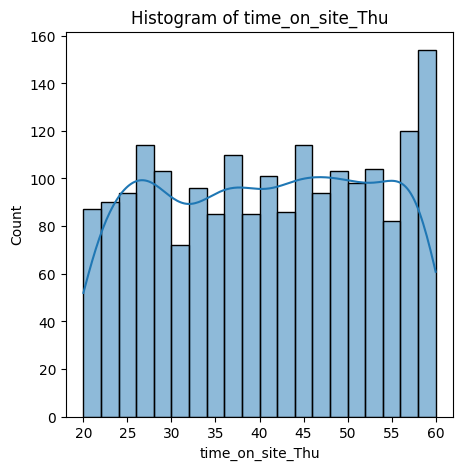

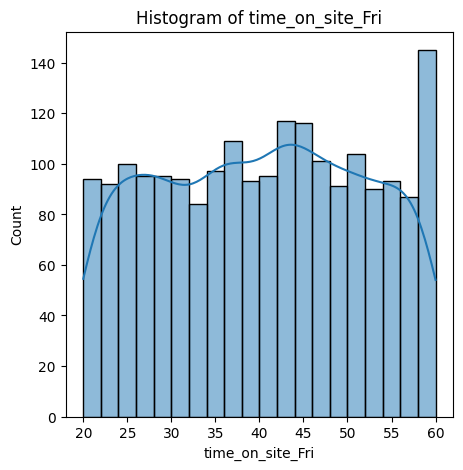

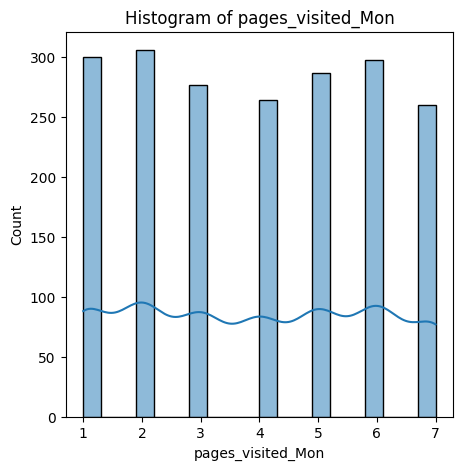

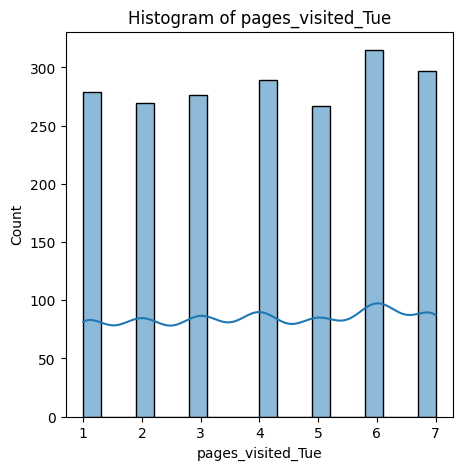

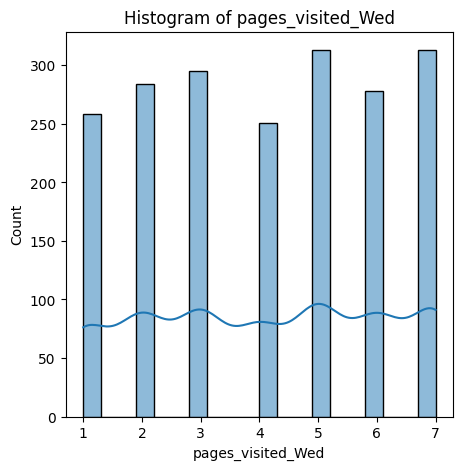

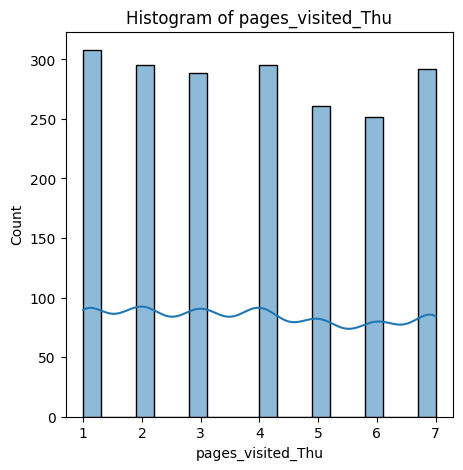

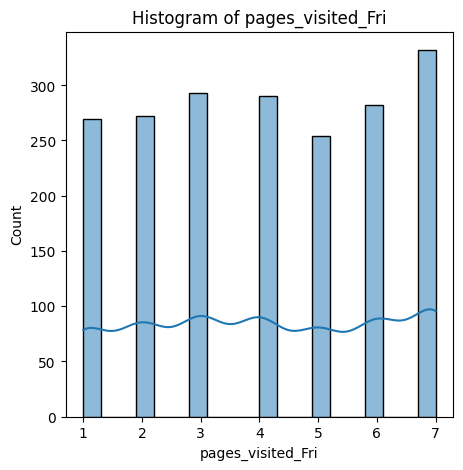

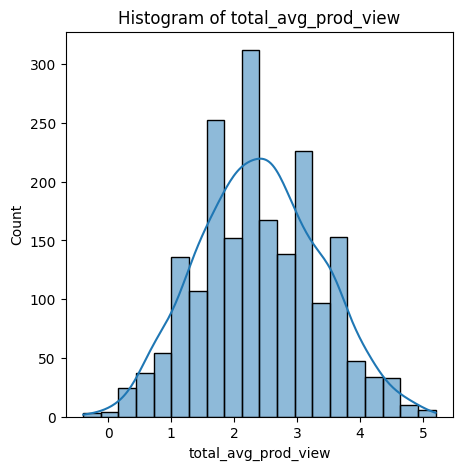

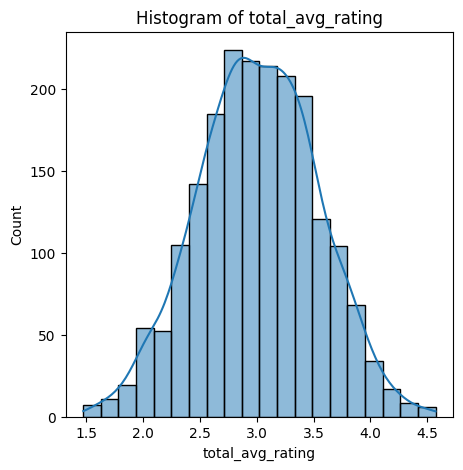

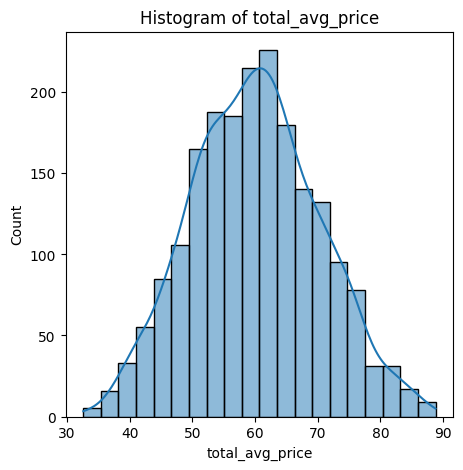

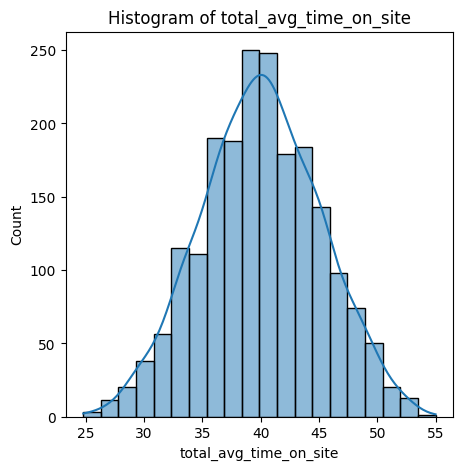

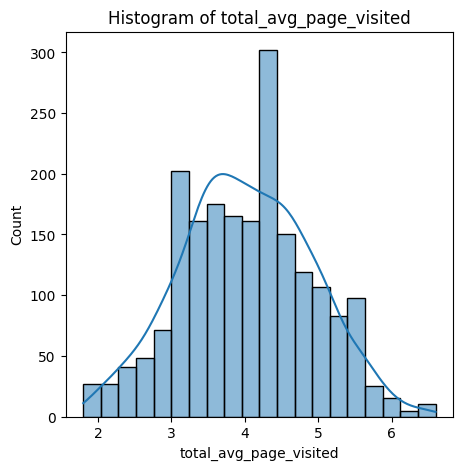

In [101]:
for column in all_numerical_Columns:
    plt.figure(figsize=(5, 5)) # Optional: Set the figure size
    sns.histplot(df[column], bins=20, kde=True) # You can customize the number of bins, KDE line, etc.
    plt.title(f'Histogram of {column}') # Add a title for each plot
    plt.show()

**Analysis Results:**
- From this we can see that except for product view other mertrics are very similar and are not variable on different days of the week. So we can use their mean and use it instead.

- For product view we can see there is a varibility, on days such as Wednesday, Thursday, Friday so we can take those to explore futhure.